### Overview
Microsoft's new movie studio aims to enter the industry successfully. Through exploratory data analysis, I have analyzed the relationship between different variables partainign to the industry. Visualizations and insights guide decision-making, empowering Microsoft to create compelling films aligned with current industry trends and audience preferences.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'movie_metadata.csv'
df = pd.read_csv(file_path)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


<ipython-input-5-e200e2332f25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


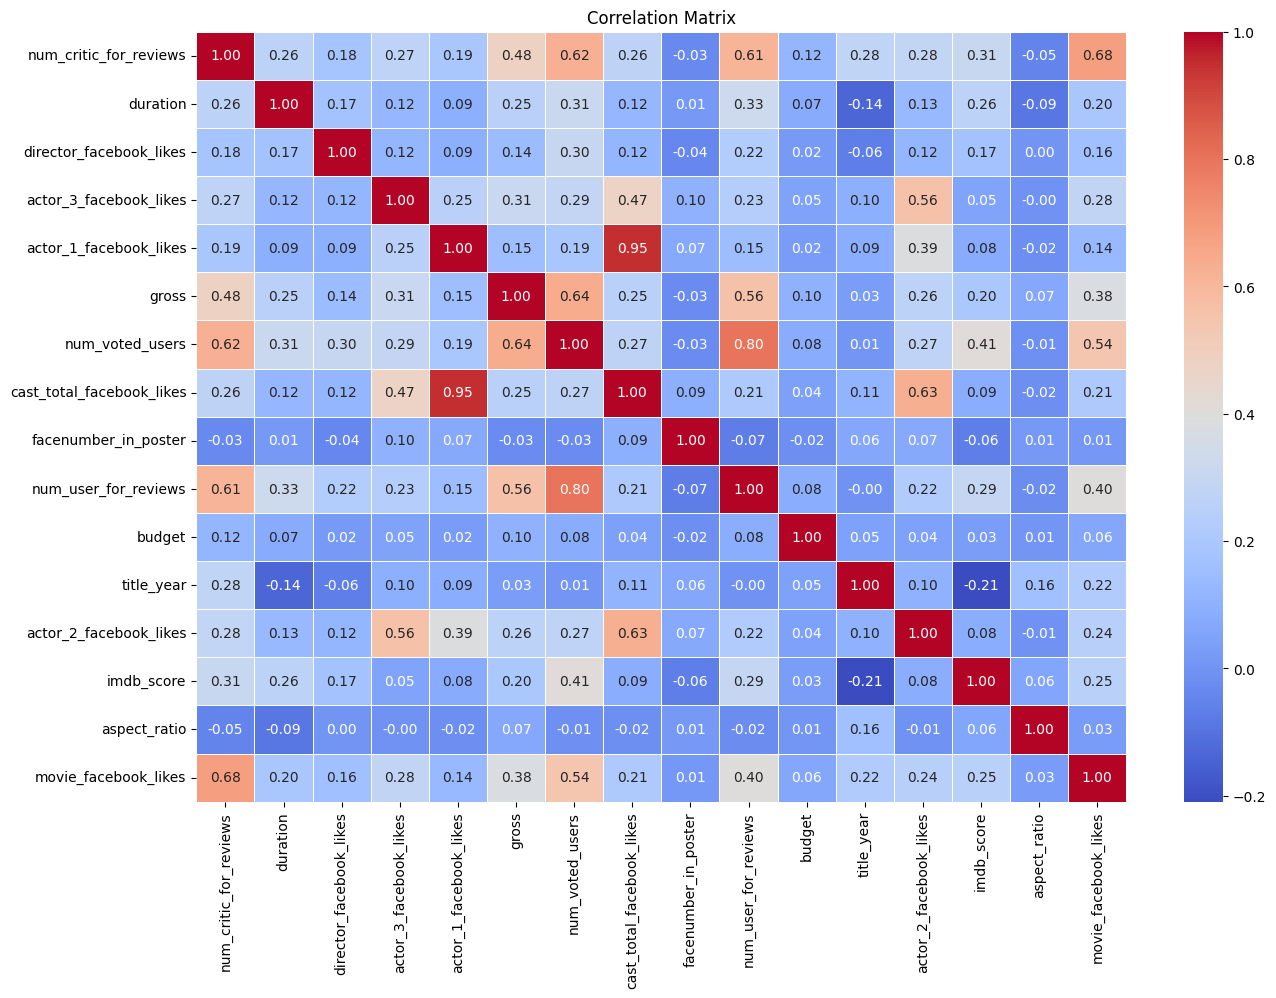

In [5]:
df['director_name'].unique()
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
selected_columns = ['movie_title','director_name','color','genres','content_rating','duration','gross','budget','title_year','imdb_score' ]

In [8]:
df = df[selected_columns]
df.head()

,movie_title,director_name,color,genres,content_rating,duration,gross,budget,title_year,imdb_score
0,Avatar,James Cameron,Color,Action|Adventure|Fantasy|Sci-Fi,PG-13,178.0,760505847.0,237000000.0,2009.0,7.9
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Color,Action|Adventure|Fantasy,PG-13,169.0,309404152.0,300000000.0,2007.0,7.1
2,Spectre,Sam Mendes,Color,Action|Adventure|Thriller,PG-13,148.0,200074175.0,245000000.0,2015.0,6.8
3,The Dark Knight Rises,Christopher Nolan,Color,Action|Thriller,PG-13,164.0,448130642.0,250000000.0,2012.0,8.5
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,7.1


Preview of the data set

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     5043 non-null   object 
 1   director_name   4939 non-null   object 
 2   color           5024 non-null   object 
 3   genres          5043 non-null   object 
 4   content_rating  4740 non-null   object 
 5   duration        5028 non-null   float64
 6   gross           4159 non-null   float64
 7   budget          4551 non-null   float64
 8   title_year      4935 non-null   float64
 9   imdb_score      5043 non-null   float64
dtypes: float64(5), object(5)
memory usage: 394.1+ KB


In [10]:
df.describe()

,duration,gross,budget,title_year,imdb_score
count,5028.000000,4.159000e+03,4.551000e+03,4935.000000,5043.000000
mean,107.201074,4.846841e+07,3.975262e+07,2002.470517,6.442138
std,25.197441,6.845299e+07,2.061149e+08,12.474599,1.125116
min,7.000000,1.620000e+02,2.180000e+02,1916.000000,1.600000
25%,93.000000,5.340988e+06,6.000000e+06,1999.000000,5.800000
50%,103.000000,2.551750e+07,2.000000e+07,2005.000000,6.600000
75%,118.000000,6.230944e+07,4.500000e+07,2011.000000,7.200000
max,511.000000,7.605058e+08,1.221550e+10,2016.000000,9.500000


In [11]:
Dataset1 = df

In [12]:
Dataset1.head(5)

,movie_title,director_name,color,genres,content_rating,duration,gross,budget,title_year,imdb_score
0,Avatar,James Cameron,Color,Action|Adventure|Fantasy|Sci-Fi,PG-13,178.0,760505847.0,237000000.0,2009.0,7.9
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Color,Action|Adventure|Fantasy,PG-13,169.0,309404152.0,300000000.0,2007.0,7.1
2,Spectre,Sam Mendes,Color,Action|Adventure|Thriller,PG-13,148.0,200074175.0,245000000.0,2015.0,6.8
3,The Dark Knight Rises,Christopher Nolan,Color,Action|Thriller,PG-13,164.0,448130642.0,250000000.0,2012.0,8.5
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,7.1


In [13]:
# correlation_matrix = df1.corr()
# plt.figure(figsize=(15,10))

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()

Datasets to be used = Dataset1, Dataset2

### Data Cleaning

In [14]:
Dataset1.head(5)
print(Dataset1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_title     5043 non-null   object 
 1   director_name   4939 non-null   object 
 2   color           5024 non-null   object 
 3   genres          5043 non-null   object 
 4   content_rating  4740 non-null   object 
 5   duration        5028 non-null   float64
 6   gross           4159 non-null   float64
 7   budget          4551 non-null   float64
 8   title_year      4935 non-null   float64
 9   imdb_score      5043 non-null   float64
dtypes: float64(5), object(5)
memory usage: 394.1+ KB
None


In [15]:
Dataset1.describe()

,duration,gross,budget,title_year,imdb_score
count,5028.000000,4.159000e+03,4.551000e+03,4935.000000,5043.000000
mean,107.201074,4.846841e+07,3.975262e+07,2002.470517,6.442138
std,25.197441,6.845299e+07,2.061149e+08,12.474599,1.125116
min,7.000000,1.620000e+02,2.180000e+02,1916.000000,1.600000
25%,93.000000,5.340988e+06,6.000000e+06,1999.000000,5.800000
50%,103.000000,2.551750e+07,2.000000e+07,2005.000000,6.600000
75%,118.000000,6.230944e+07,4.500000e+07,2011.000000,7.200000
max,511.000000,7.605058e+08,1.221550e+10,2016.000000,9.500000


In [16]:
Dataset1.isnull().mean()

movie_title       0.000000
director_name     0.020623
color             0.003768
genres            0.000000
content_rating    0.060083
duration          0.002974
gross             0.175292
budget            0.097561
title_year        0.021416
imdb_score        0.000000
dtype: float64

### 1. Investigating distribution of gross and its correlation to other values to know how to fill the missing values

In [17]:
print(df['gross'].max())
print(df['gross'].min())
print(df['gross'].mode())


760505847.0
162.0
0      3000000.0
1      5773519.0
2      8000000.0
3     34964818.0
4     47000000.0
5    144512310.0
6    177343675.0
7    218051260.0
Name: gross, dtype: float64


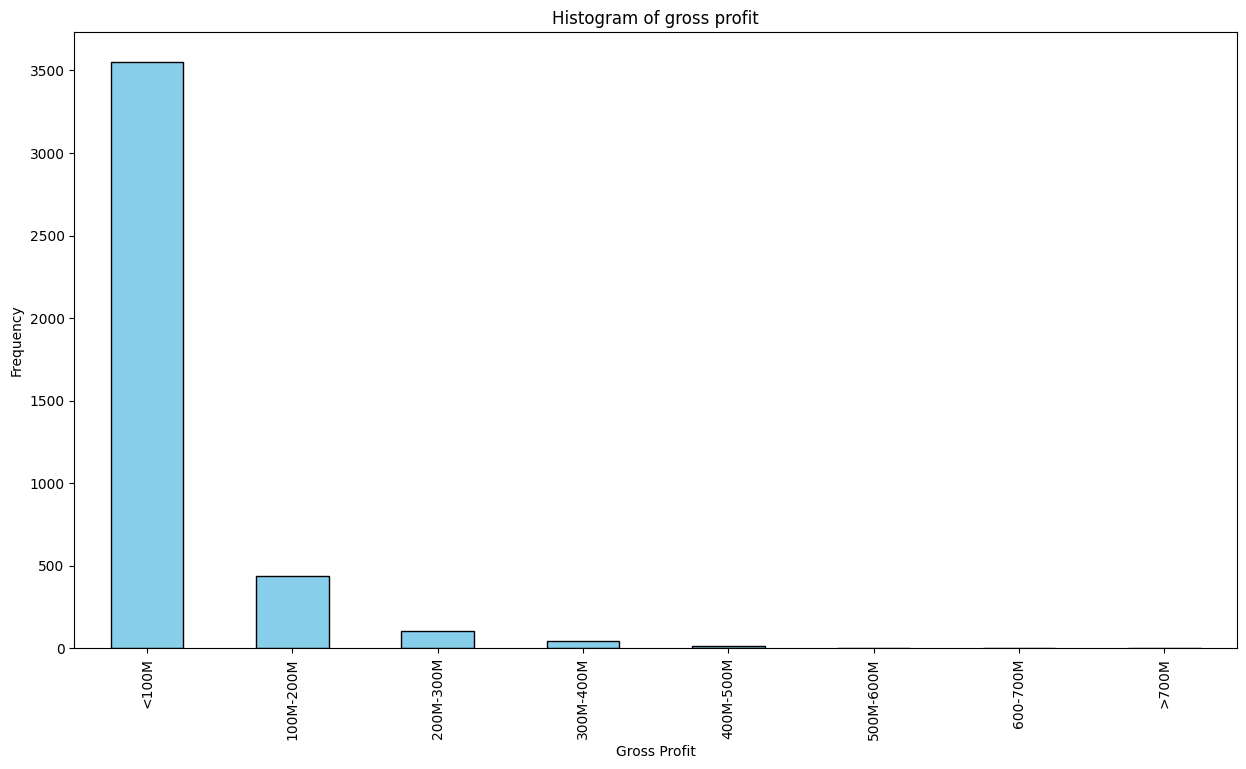

In [18]:
plt.figure(figsize=(15,8))
bin_edges = [0,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000]
bin_labels = ['<100M','100M-200M','200M-300M','300M-400M','400M-500M','500M-600M','600-700M','>700M']
Dataset1['gross_group'] = pd.cut(df['gross'], bins = bin_edges, labels=bin_labels, include_lowest=True)
Dataset1['gross_group'].value_counts().sort_index().plot(kind='bar',color='skyblue', edgecolor='black')
plt.title('Histogram of gross profit')
plt.xlabel('Gross Profit')
plt.ylabel('Frequency')
plt.show()

<ipython-input-19-59e939c95f9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Dataset1.corr()


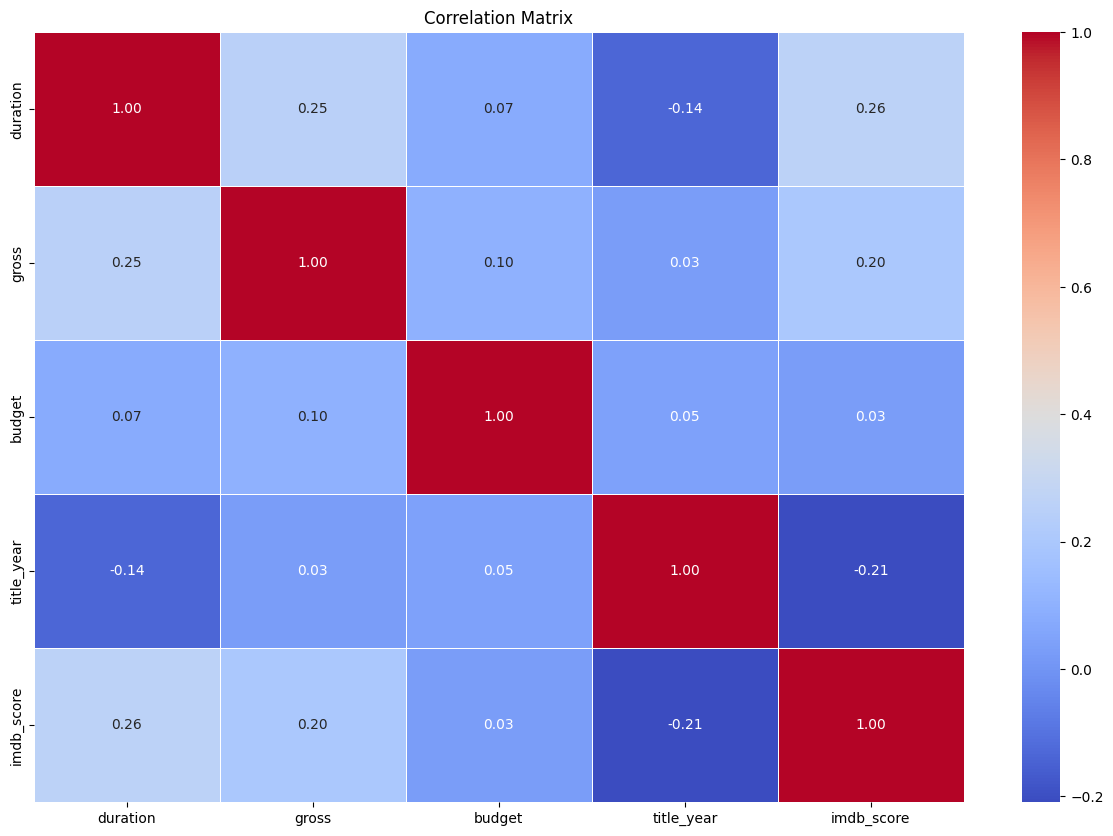

In [19]:
correlation_matrix = Dataset1.corr()
plt.figure(figsize=(15,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Since the data is rightly skewed it is preferable to use median to fill the missing values
Dataset1['gross'].fillna(Dataset1['gross'].median(), inplace = True)
Dataset1.info()
Dataset1.isnull().mean()*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   movie_title     5043 non-null   object  
 1   director_name   4939 non-null   object  
 2   color           5024 non-null   object  
 3   genres          5043 non-null   object  
 4   content_rating  4740 non-null   object  
 5   duration        5028 non-null   float64 
 6   gross           5043 non-null   float64 
 7   budget          4551 non-null   float64 
 8   title_year      4935 non-null   float64 
 9   imdb_score      5043 non-null   float64 
 10  gross_group     4159 non-null   category
dtypes: category(1), float64(5), object(5)
memory usage: 399.4+ KB


movie_title        0.000000
director_name      2.062265
color              0.376760
genres             0.000000
content_rating     6.008328
duration           0.297442
gross              0.000000
budget             9.756098
title_year         2.141582
imdb_score         0.000000
gross_group       17.529248
dtype: float64

### 2. Investigating content rating to know how to fill the missing values

In [21]:
Dataset1['content_rating'].unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [22]:
#Due to the naute of the data drop rows with missing values
Dataset1.dropna(subset=['content_rating'], inplace = True)
print(Dataset1.info())
print(Dataset1.isnull().mean()*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740 entries, 0 to 5042
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   movie_title     4740 non-null   object  
 1   director_name   4674 non-null   object  
 2   color           4727 non-null   object  
 3   genres          4740 non-null   object  
 4   content_rating  4740 non-null   object  
 5   duration        4737 non-null   float64 
 6   gross           4740 non-null   float64 
 7   budget          4345 non-null   float64 
 8   title_year      4674 non-null   float64 
 9   imdb_score      4740 non-null   float64 
 10  gross_group     4095 non-null   category
dtypes: category(1), float64(5), object(5)
memory usage: 412.3+ KB
None
movie_title        0.000000
director_name      1.392405
color              0.274262
genres             0.000000
content_rating     0.000000
duration           0.063291
gross              0.000000
budget             8.333333

### 3.Investigating budget to work on the missing values


In [23]:
print(df['budget'].max())
print(df['budget'].min())
print(df['budget'].mode())

12215500000.0
218.0
0    20000000.0
Name: budget, dtype: float64


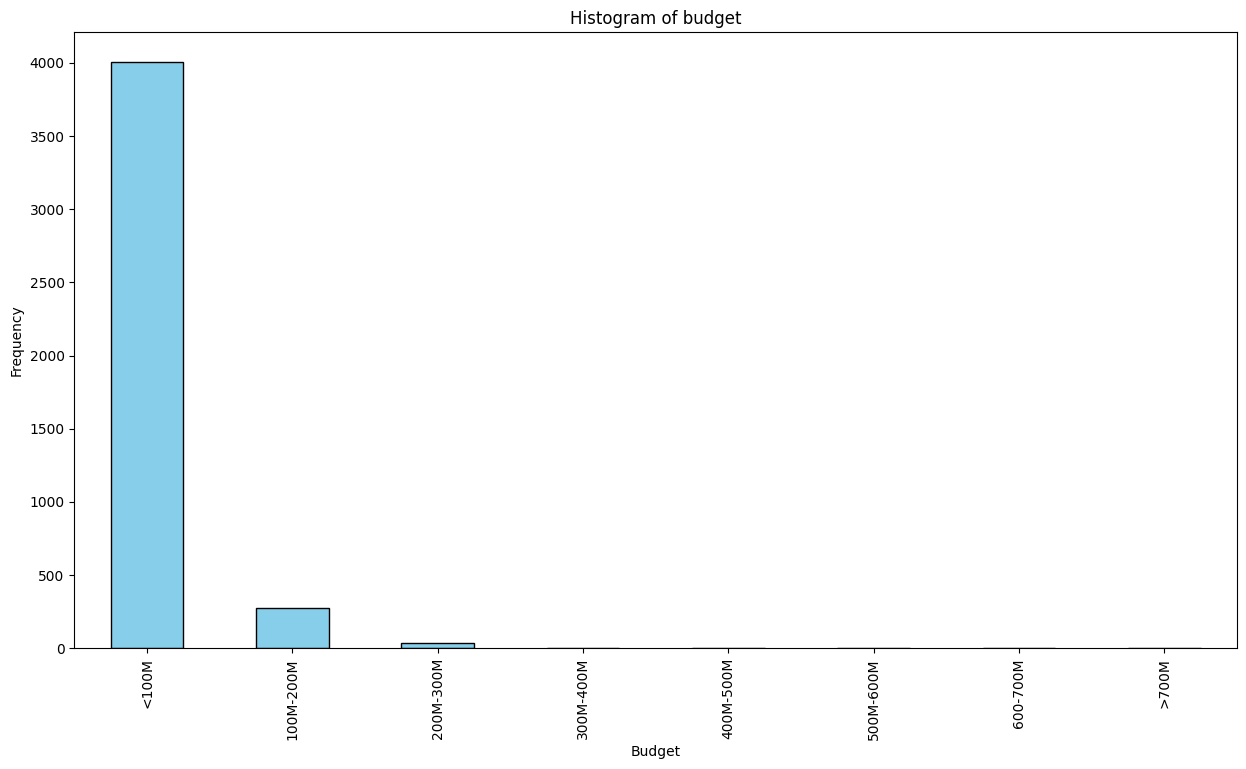

In [60]:
plt.figure(figsize=(15,8))
budget_bin = [0,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000]
budget_label = ['<100M','100M-200M','200M-300M','300M-400M','400M-500M','500M-600M','600-700M','>700M']
Dataset1['budget_group'] = pd.cut(df['budget'], bins = budget_bin, labels=budget_label, include_lowest=True)
Dataset1['budget_group'].value_counts().sort_index().plot(kind='bar',color='skyblue', edgecolor='black')
plt.title('Histogram of budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Since the data is rightly skewed it is preferable to use median to fill the missing values
Dataset1['budget'].fillna(Dataset1['budget'].median(), inplace = True)
print(Dataset1.info())
print(Dataset1.isnull().mean()*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   movie_title     4740 non-null   object  
 1   director_name   4674 non-null   object  
 2   color           4727 non-null   object  
 3   genres          4740 non-null   object  
 4   content_rating  4740 non-null   object  
 5   duration        4737 non-null   float64 
 6   gross           4740 non-null   float64 
 7   budget          4740 non-null   float64 
 8   title_year      4674 non-null   float64 
 9   imdb_score      4740 non-null   float64 
 10  gross_group     4095 non-null   category
 11  budget_group    4338 non-null   category
dtypes: category(2), float64(5), object(5)
memory usage: 417.3+ KB
None
movie_title        0.000000
director_name      1.392405
color              0.274262
genres             0.000000
content_rating     0.000000
duration           0.063291
gross    

### 4. Investigating distribution duration to know how to handle the missing values

In [26]:
type(Dataset1['duration'])

pandas.core.series.Series

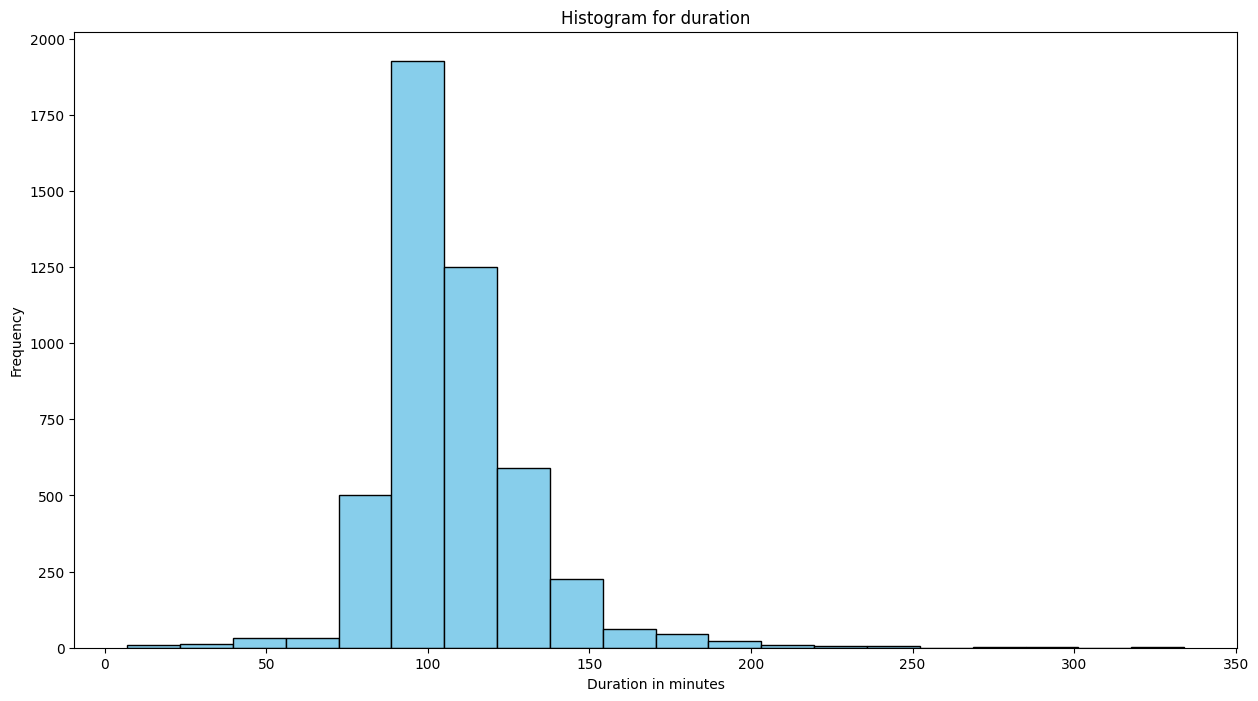

In [27]:
plt.figure(figsize=(15,8))
plt.hist(Dataset1['duration'], bins=20, color='skyblue', edgecolor = 'black')
plt.title('Histogram for duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.show()

In [28]:
#Since the data is symmetric skewed we can fill the data using the mean
Dataset1['duration'].fillna(Dataset1['duration'].mean(), inplace=True)
print(Dataset1.info())
print(Dataset1.isnull().mean()*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   movie_title     4740 non-null   object  
 1   director_name   4674 non-null   object  
 2   color           4727 non-null   object  
 3   genres          4740 non-null   object  
 4   content_rating  4740 non-null   object  
 5   duration        4740 non-null   float64 
 6   gross           4740 non-null   float64 
 7   budget          4740 non-null   float64 
 8   title_year      4674 non-null   float64 
 9   imdb_score      4740 non-null   float64 
 10  gross_group     4095 non-null   category
 11  budget_group    4338 non-null   category
dtypes: category(2), float64(5), object(5)
memory usage: 417.3+ KB
None
movie_title        0.000000
director_name      1.392405
color              0.274262
genres             0.000000
content_rating     0.000000
duration           0.000000
gross    

### 5. Investigating color column to see how to handle the missing values

In [29]:
Dataset1['color'].unique()

array(['Color', ' Black and White', nan], dtype=object)

In [30]:
Dataset1.dropna(subset=['color'], inplace = True)
print(Dataset1.info())
print(Dataset1.isnull().mean()*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4727 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   movie_title     4727 non-null   object  
 1   director_name   4662 non-null   object  
 2   color           4727 non-null   object  
 3   genres          4727 non-null   object  
 4   content_rating  4727 non-null   object  
 5   duration        4727 non-null   float64 
 6   gross           4727 non-null   float64 
 7   budget          4727 non-null   float64 
 8   title_year      4662 non-null   float64 
 9   imdb_score      4727 non-null   float64 
 10  gross_group     4093 non-null   category
 11  budget_group    4327 non-null   category
dtypes: category(2), float64(5), object(5)
memory usage: 416.2+ KB
None
movie_title        0.000000
director_name      1.375079
color              0.000000
genres             0.000000
content_rating     0.000000
duration           0.000000
gross    

### 5. Investigating title year column to see how to handle the missing values


In [31]:
Dataset1['title_year'].unique()

array([2009., 2007., 2015., 2012., 2010., 2016., 2006., 2008., 2013.,
       2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003., 2001.,
       2002., 1998.,   nan, 2000., 1990., 1991., 1994., 1996., 1982.,
       1993., 1979., 1992., 1989., 1984., 1988., 1978., 1962., 1980.,
       1972., 1981., 1968., 1985., 1940., 1963., 1987., 1986., 1973.,
       1983., 1976., 1977., 1970., 1971., 1969., 1960., 1965., 1964.,
       1927., 1974., 1937., 1975., 1967., 1951., 1961., 1946., 1953.,
       1954., 1932., 1947., 1956., 1945., 1952., 1930., 1966., 1939.,
       1950., 1948., 1959., 1958., 1957., 1943., 1944., 1938., 1949.,
       1936., 1941., 1955., 1942., 1929., 1935., 1933., 1916., 1934.,
       1925.])

In [32]:
Dataset1.describe()

,duration,gross,budget,title_year,imdb_score
count,4727.000000,4.727000e+03,4.727000e+03,4662.000000,4727.000000
mean,107.909805,4.603554e+07,3.943731e+07,2002.106607,6.445462
std,23.667760,6.446817e+07,2.019966e+08,12.487746,1.113380
min,7.000000,1.620000e+02,2.180000e+02,1916.000000,1.600000
25%,94.000000,8.116856e+06,8.000000e+06,1999.000000,5.800000
50%,104.000000,2.551750e+07,2.000000e+07,2005.000000,6.600000
75%,118.000000,5.474137e+07,4.000000e+07,2010.000000,7.200000
max,334.000000,7.605058e+08,1.221550e+10,2016.000000,9.300000


In [33]:
#Due to the nature of the data we drop the columns with missing values
Dataset1.dropna(subset=['title_year'], inplace = True)
print(Dataset1.info())
print(Dataset1.isnull().mean()*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4662 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   movie_title     4662 non-null   object  
 1   director_name   4662 non-null   object  
 2   color           4662 non-null   object  
 3   genres          4662 non-null   object  
 4   content_rating  4662 non-null   object  
 5   duration        4662 non-null   float64 
 6   gross           4662 non-null   float64 
 7   budget          4662 non-null   float64 
 8   title_year      4662 non-null   float64 
 9   imdb_score      4662 non-null   float64 
 10  gross_group     4090 non-null   category
 11  budget_group    4322 non-null   category
dtypes: category(2), float64(5), object(5)
memory usage: 410.5+ KB
None
movie_title        0.000000
director_name      0.000000
color              0.000000
genres             0.000000
content_rating     0.000000
duration           0.000000
gross    

### 6. Investigating budget_group column to see how to handle the missing values

In [34]:
#Due to the nature of the data we drop the columns with missing values
Dataset1.dropna(subset=['budget_group'], inplace = True)
print(Dataset1.info())
print(Dataset1.isnull().mean()*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4322 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   movie_title     4322 non-null   object  
 1   director_name   4322 non-null   object  
 2   color           4322 non-null   object  
 3   genres          4322 non-null   object  
 4   content_rating  4322 non-null   object  
 5   duration        4322 non-null   float64 
 6   gross           4322 non-null   float64 
 7   budget          4322 non-null   float64 
 8   title_year      4322 non-null   float64 
 9   imdb_score      4322 non-null   float64 
 10  gross_group     3831 non-null   category
 11  budget_group    4322 non-null   category
dtypes: category(2), float64(5), object(5)
memory usage: 380.6+ KB
None
movie_title        0.000000
director_name      0.000000
color              0.000000
genres             0.000000
content_rating     0.000000
duration           0.000000
gross    

### 7. Investigating gross_group column to see how to handle the missing values

In [35]:
Dataset1['gross_group'] = pd.cut(Dataset1['gross'], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [36]:
print(Dataset1.info())
print(Dataset1.isnull().mean()*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4322 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   movie_title     4322 non-null   object  
 1   director_name   4322 non-null   object  
 2   color           4322 non-null   object  
 3   genres          4322 non-null   object  
 4   content_rating  4322 non-null   object  
 5   duration        4322 non-null   float64 
 6   gross           4322 non-null   float64 
 7   budget          4322 non-null   float64 
 8   title_year      4322 non-null   float64 
 9   imdb_score      4322 non-null   float64 
 10  gross_group     4322 non-null   category
 11  budget_group    4322 non-null   category
dtypes: category(2), float64(5), object(5)
memory usage: 380.6+ KB
None
movie_title       0.0
director_name     0.0
color             0.0
genres            0.0
content_rating    0.0
duration          0.0
gross             0.0
budget            0.0
t

The dataset is completely cleaned

### Data analysis

### Univariate Analysis

In [37]:
Dataset1.head(5)

,movie_title,director_name,color,genres,content_rating,duration,gross,budget,title_year,imdb_score,gross_group,budget_group
0,Avatar,James Cameron,Color,Action|Adventure|Fantasy|Sci-Fi,PG-13,178.0,760505847.0,237000000.0,2009.0,7.9,>700M,200M-300M
1,Pirates of the Caribbean: At World's End,Gore Verbinski,Color,Action|Adventure|Fantasy,PG-13,169.0,309404152.0,300000000.0,2007.0,7.1,300M-400M,200M-300M
2,Spectre,Sam Mendes,Color,Action|Adventure|Thriller,PG-13,148.0,200074175.0,245000000.0,2015.0,6.8,200M-300M,200M-300M
3,The Dark Knight Rises,Christopher Nolan,Color,Action|Thriller,PG-13,164.0,448130642.0,250000000.0,2012.0,8.5,400M-500M,200M-300M
5,John Carter,Andrew Stanton,Color,Action|Adventure|Sci-Fi,PG-13,132.0,73058679.0,263700000.0,2012.0,6.6,<100M,200M-300M


Analysis of different columns

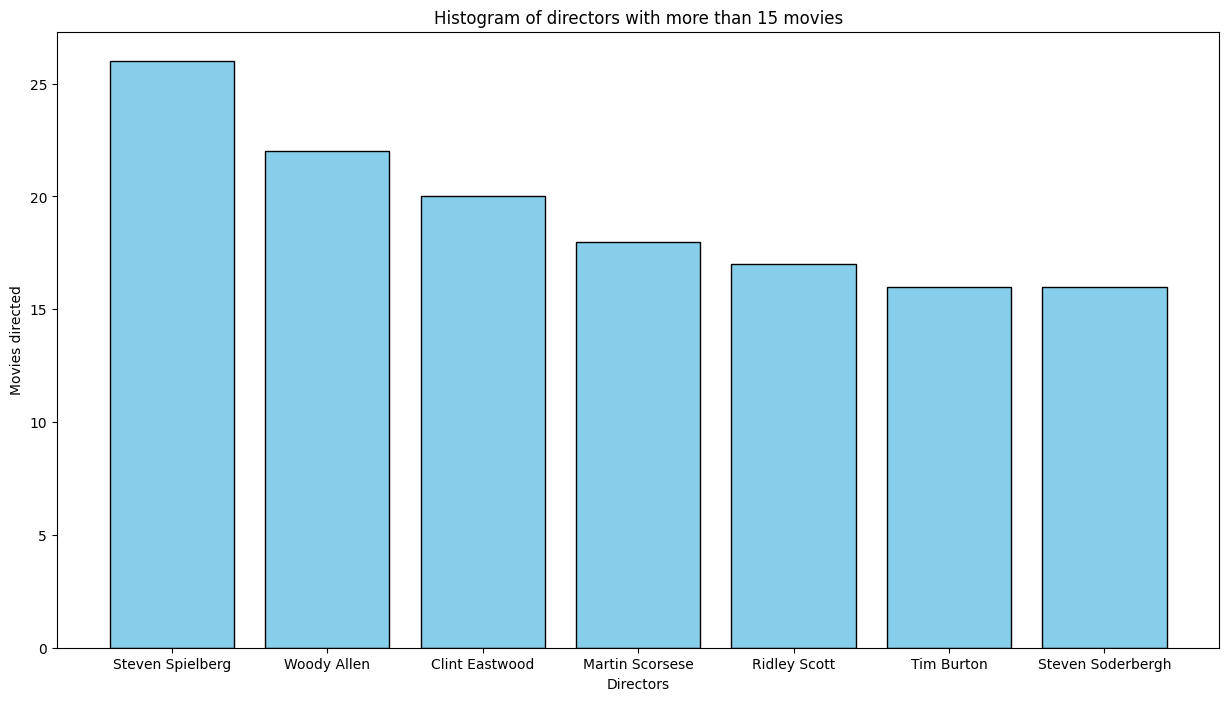

In [38]:
#Directors
dir_movie_count = Dataset1['director_name'].value_counts()
dir_more_15 = dir_movie_count[dir_movie_count > 15]

plt.figure(figsize=(15,8))
plt.bar(dir_more_15.index, dir_more_15.values, color = 'skyblue', edgecolor='black')
plt.title('Histogram of directors with more than 15 movies')
plt.xlabel('Directors')
plt.ylabel('Movies directed')
plt.show()

In [39]:
Dataset1.columns

Index(['movie_title', 'director_name', 'color', 'genres', 'content_rating',
       'duration', 'gross', 'budget', 'title_year', 'imdb_score',
       'gross_group', 'budget_group'],
      dtype='object')

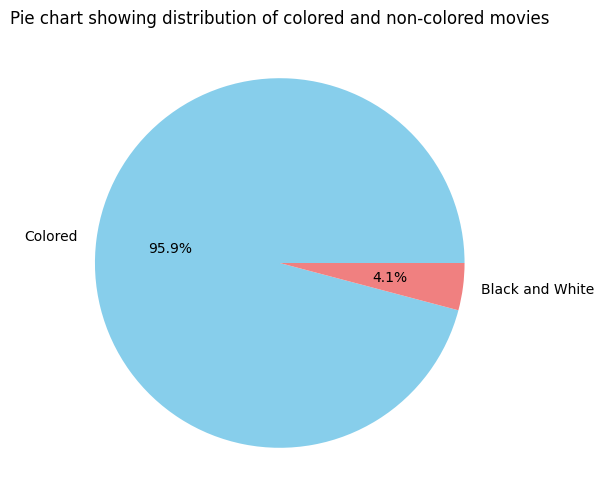

In [40]:
# Color
labels = ['Colored','Black and White']
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(10,6))
plt.pie(Dataset1['color'].value_counts(), labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Pie chart showing distribution of colored and non-colored movies')
plt.show()

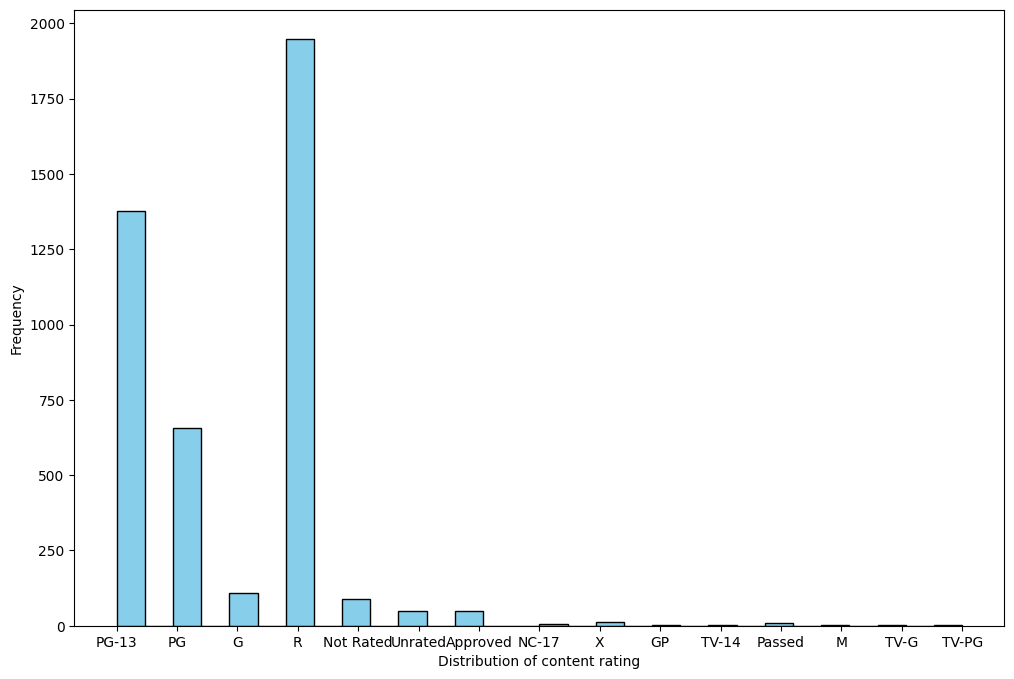

In [48]:
#Distribution of content ratings
plt.figure(figsize=(12,8))
content_rating = Dataset1['content_rating']
plt.hist(content_rating, bins = 30, color = 'skyblue', edgecolor='black')
plt.xlabel('Distribution of content rating')
plt.ylabel('Frequency')
plt.show()

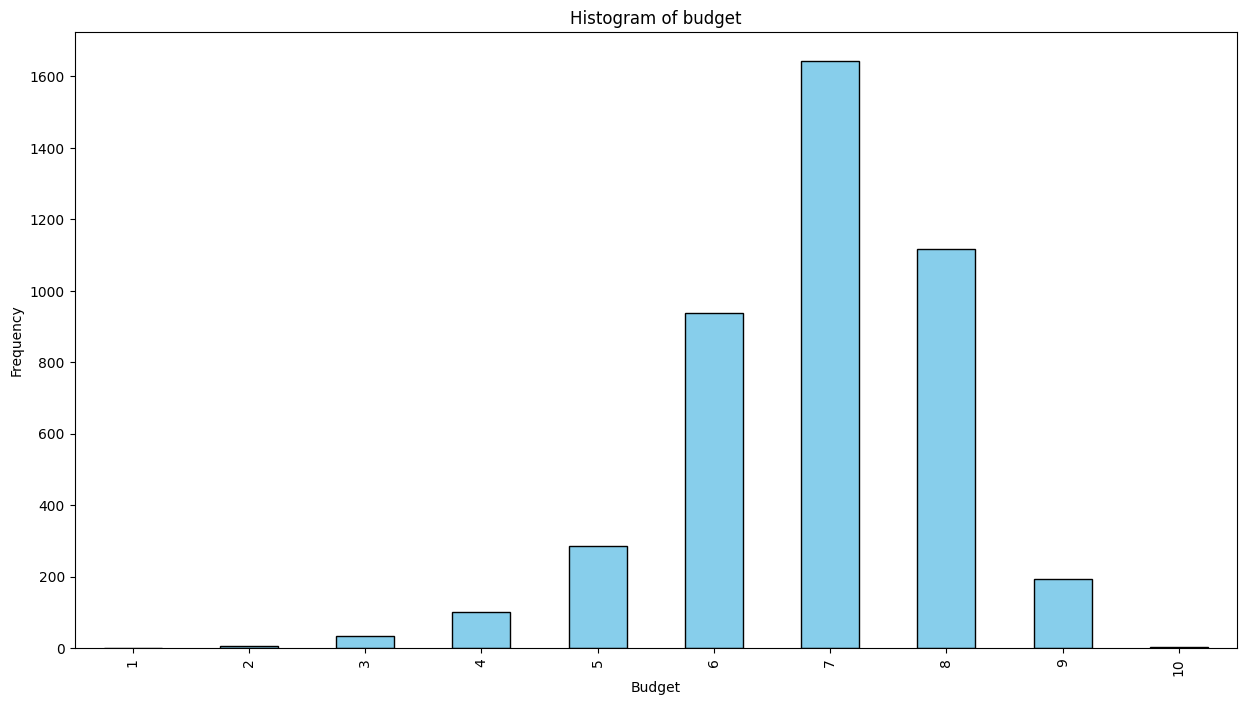

In [59]:
#Distribution of imdb score
plt.figure(figsize=(15,8))
imdbscore_bin = [0,1,2,3,4,5,6,7,8,9,10]
imdbscore_label = ['1','2','3','4','5','6','7','8','9','10']
Dataset1['ratings_group'] = pd.cut(df['imdb_score'], bins = imdbscore_bin, labels=imdbscore_label, include_lowest=True)
Dataset1['ratings_group'].value_counts().sort_index().plot(kind='bar',color='skyblue', edgecolor='black')
plt.title('Histogram of budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

Bivariate Analysis

<ipython-input-55-d800605025bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Dataset1.corr()


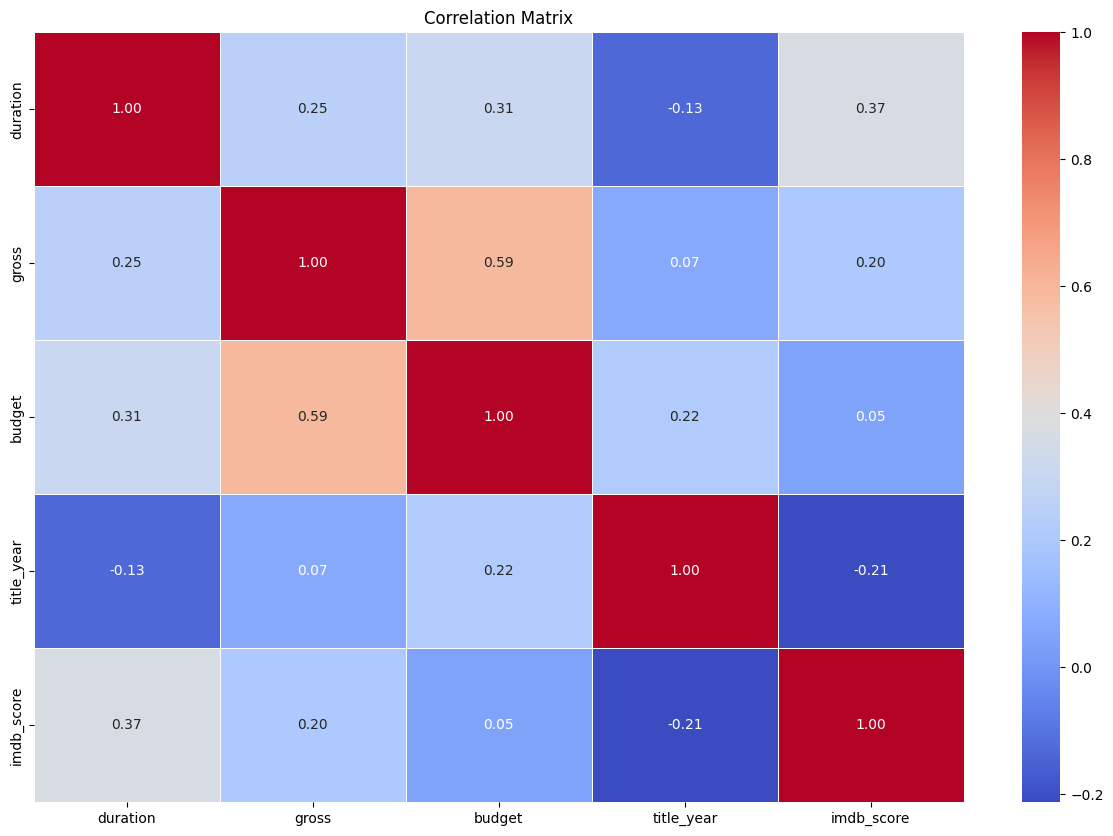

In [55]:
#correlation matrix for the dataset
correlation_matrix = Dataset1.corr()
plt.figure(figsize=(15,10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

From the correlation heatmap we can see which variables strongly correlate and those that do not have much of an effect on each other

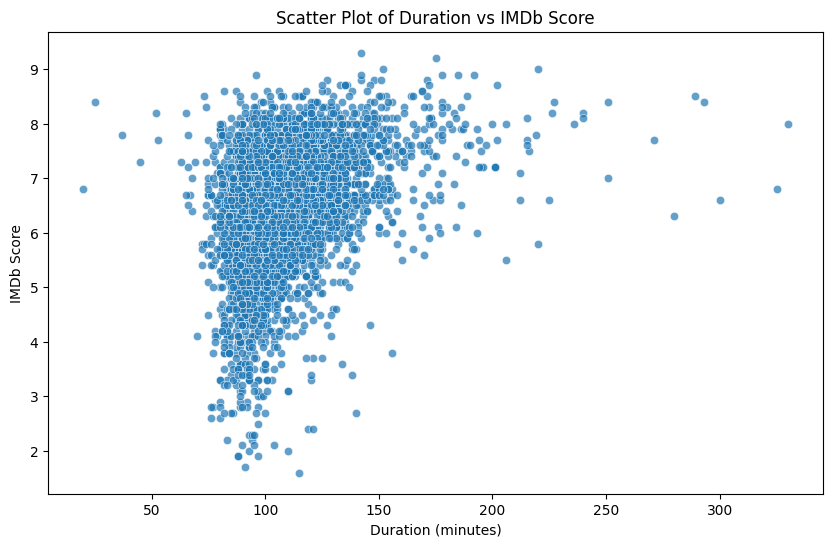

In [57]:
#Representation of duration to imdb_score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='imdb_score', data=df, alpha=0.7)
plt.title('Scatter Plot of Duration vs IMDb Score')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Score')
plt.show()

<ipython-input-58-8e523243fa77>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_imdb_scores.index, y=average_imdb_scores.values, palette='viridis')


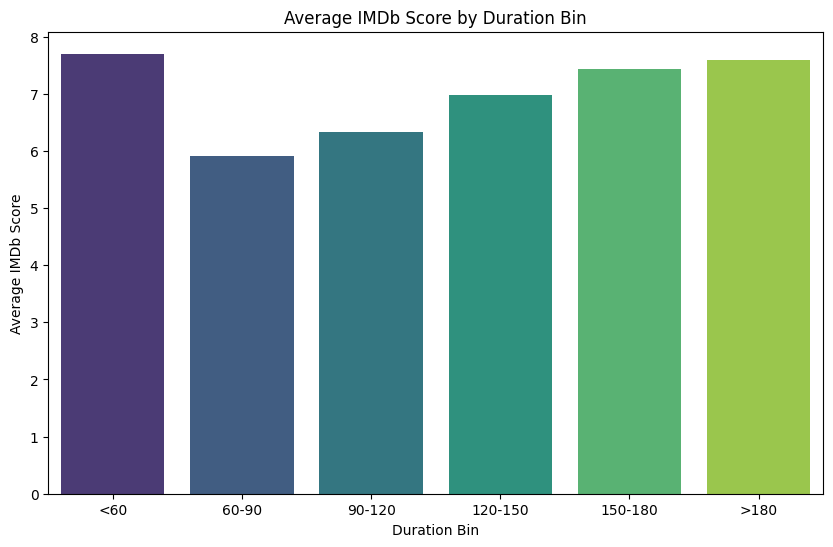

In [58]:
#Dividing the duration into parts for easier analysis
duration_bins = [0, 60, 90, 120, 150, 180, float('inf')]
duration_labels = ['<60', '60-90', '90-120', '120-150', '150-180', '>180']

Dataset1['duration_bin'] = pd.cut(Dataset1['duration'], bins=duration_bins, labels=duration_labels, include_lowest=True)

average_imdb_scores = Dataset1.groupby('duration_bin')['imdb_score'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_imdb_scores.index, y=average_imdb_scores.values, palette='viridis')
plt.title('Average IMDb Score by Duration Bin')
plt.xlabel('Duration Bin')
plt.ylabel('Average IMDb Score')
plt.show()


In [62]:
Dataset1.columns

Index(['movie_title', 'director_name', 'color', 'genres', 'content_rating',
       'duration', 'gross', 'budget', 'title_year', 'imdb_score',
       'gross_group', 'budget_group', 'ratings_group', 'duration_bin'],
      dtype='object')

<ipython-input-63-5528def0162c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_gross_by_budget.index, y=average_gross_by_budget.values, palette='viridis')


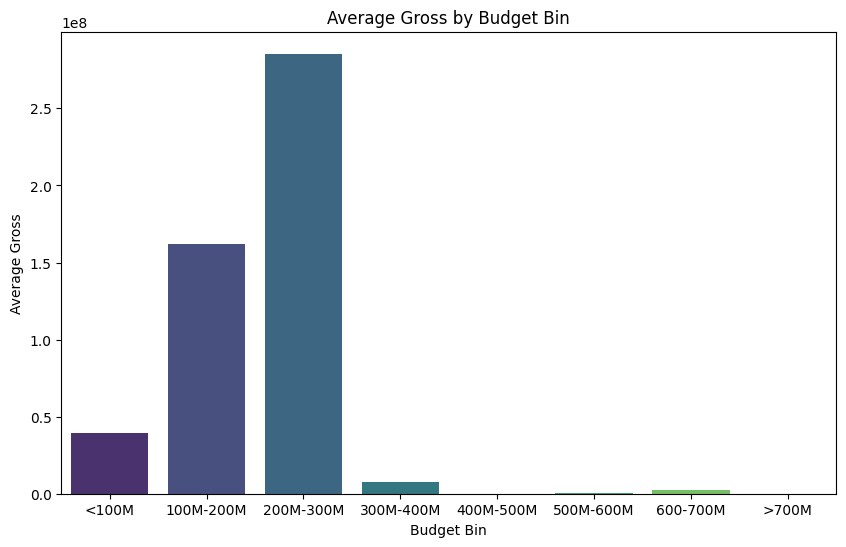

In [63]:
#Representation of budget to gross
average_gross_by_budget = Dataset1.groupby('budget_group')['gross'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_gross_by_budget.index, y=average_gross_by_budget.values, palette='viridis')
plt.title('Average Gross by Budget Bin')
plt.xlabel('Budget Bin')
plt.ylabel('Average Gross')
plt.show()

<Figure size 1200x800 with 0 Axes>

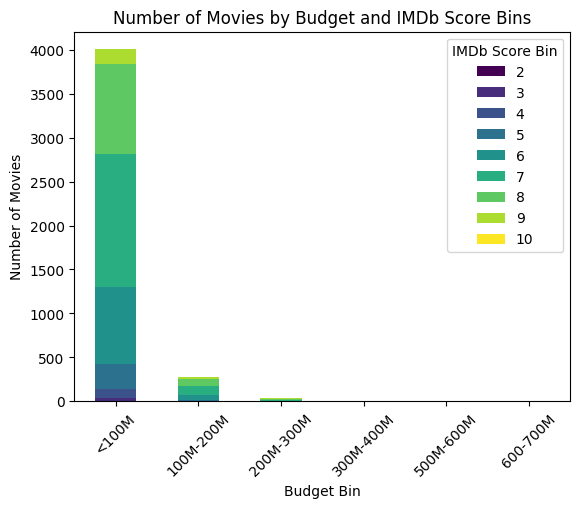

In [69]:
#Representation of budget to imbd_score
#We will use a contigency teable
# Create a contingency table
contingency_table = pd.crosstab(Dataset1['budget_group'], Dataset1['ratings_group'])

# Plot
plt.figure(figsize=(15, 8))
contingency_table.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Number of Movies by Budget and IMDb Score Bins')
plt.xlabel('Budget Bin')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='IMDb Score Bin')
plt.show()

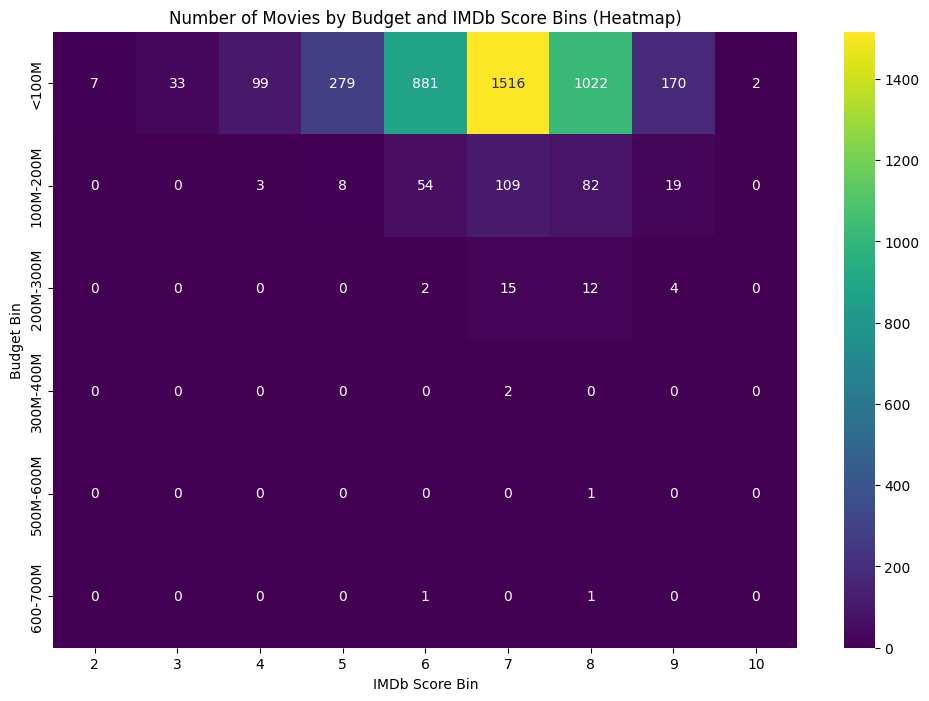

In [70]:
contingency_table = pd.crosstab(Dataset1['budget_group'], Dataset1['ratings_group'])

plt.figure(figsize=(15, 8))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='g', cbar=True)
plt.title('Number of Movies by Budget and IMDb Score Bins (Heatmap)')
plt.xlabel('IMDb Score Bin')
plt.ylabel('Budget Bin')
plt.show()

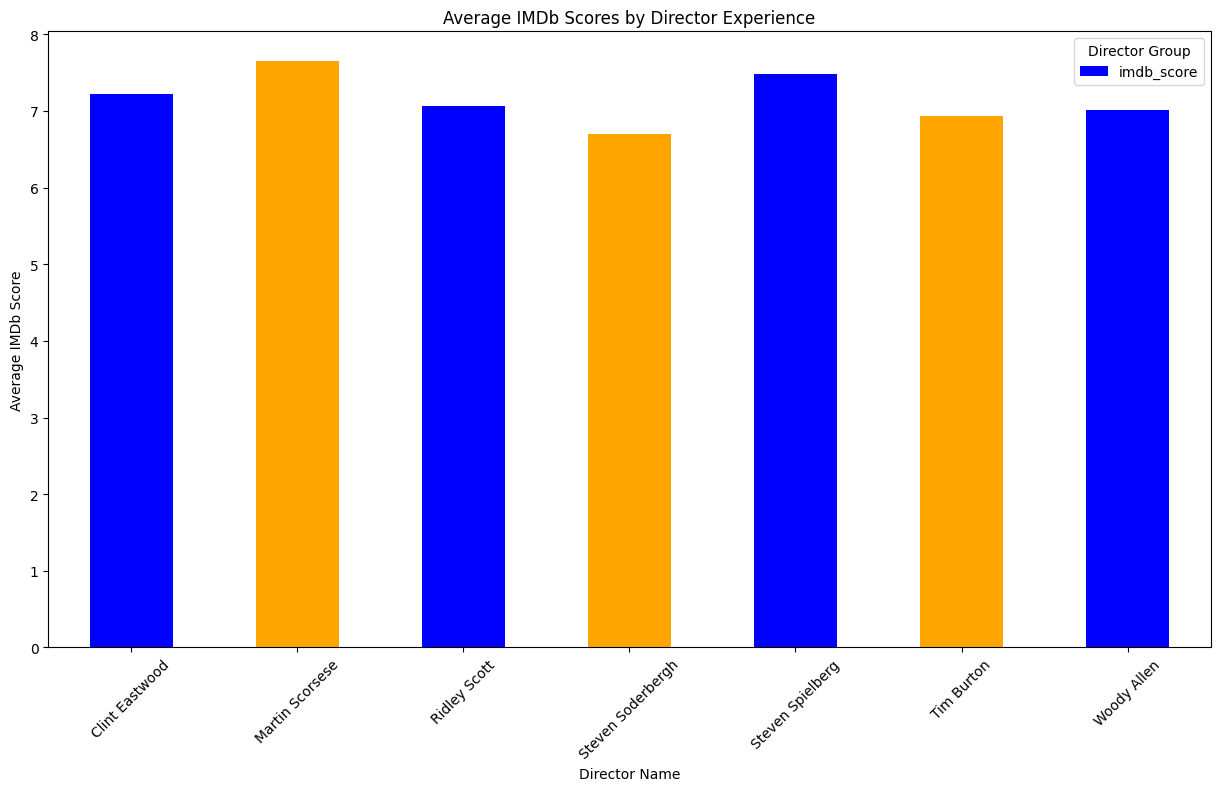

In [74]:
# Analysing the influence of directors to imdb score
avg_more_than_15 = Dataset1[Dataset1['director_name'].isin(dir_more_15.index)].groupby('director_name')['imdb_score'].mean()

plt.figure(figsize=(15, 8))
avg_more_than_15.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average IMDb Scores by Director Experience')
plt.xlabel('Director Name')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.legend(title='Director Group')
plt.show()


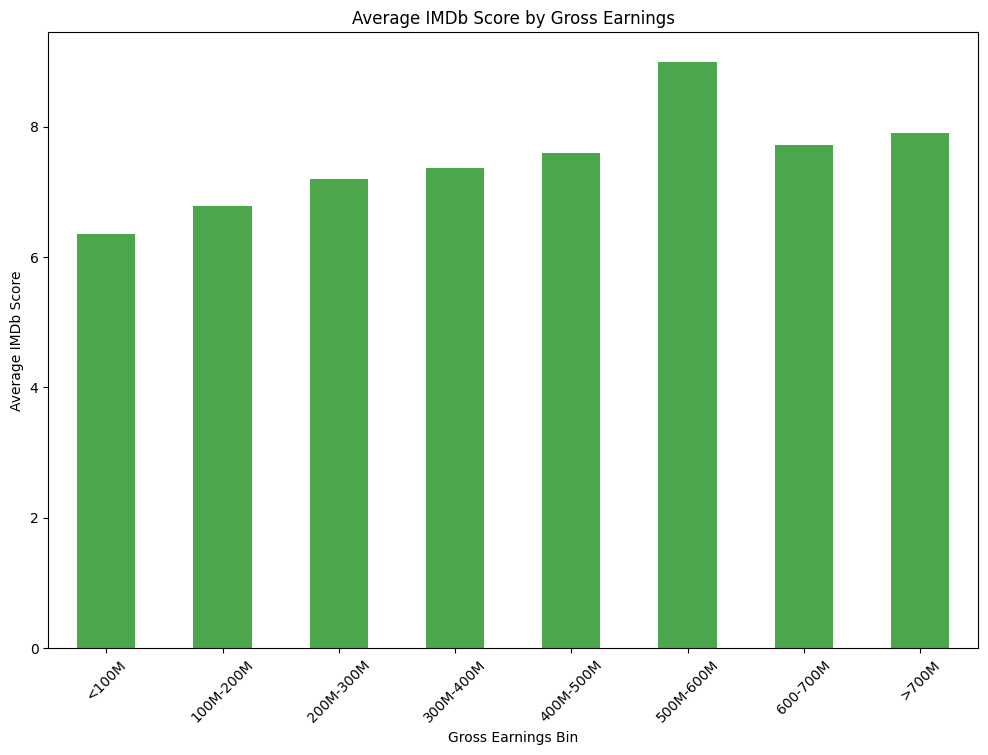

In [76]:
avg_imdb_by_gross = Dataset1.groupby('gross_group')['imdb_score'].mean()

# Plot the results
plt.figure(figsize=(12, 8))
avg_imdb_by_gross.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average IMDb Score by Gross Earnings')
plt.xlabel('Gross Earnings Bin')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()

### Recommendations
1.The correlation between directors and IMDb scores underscores the pivotal role of directors in shaping a movie's quality. This analysis emphasizes that the choice of a director significantly influences the overall excellence and reception of a film, reinforcing the importance of directorial expertise in achieving higher IMDb ratings.

2.Based on the analysis of gross to budget, the optimal budget range for maximizing box office earnings is identified between $200M and $300M. Investing within this range is associated with the most favorable financial returns for movie productions.

3.The examination of movie duration in relation to IMDb scores reveals that films with a duration less than 60 minutes achieve an average rating of 7.7. For movies lasting between 150 and 180 minutes, the average IMDb score is 7.5, while those exceeding 180 minutes attain a score of 7.6. This analysis suggests that shorter and longer durations are associated with slightly higher ratings compared to movies of intermediate length.

4.It is recommended to prioritize movies with higher IMDb scores, as they tend to yield increased gross earnings. However, caution is advised in the $500 million to $600 million gross range, as despite positive IMDb scores, a significant reduction in earnings is observed. Proactive decision-making is encouraged to optimize financial outcomes.

### Conclusion
In conclusion, our exploratory data analysis reveals valuable insights for Microsoft's new movie studio venture. By examining various trends,and the relationship between various variables, we've provided actionable insights for creating successful films. This data-driven approach ensures informed decision-making and sets the foundation for a promising entry into the competitive movie industry.